### Тестовое задание от GameDev

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Описание задачи</h1>

Вам нужно исследовать данные о прохождении игроками уровней игры и
выполнить следующие задания:
    
Задание 1. Предложить метрику, описывающую сложность уровней, и рассчитать ее.  
Задание 2. По результатам предыдущего задания разделить уровни на группы по сложности и сделать вывод о плотности расположения сложных уровней в игре.  
Задание 3. Рассчитать "воронку" прохождения уровней новым пользователем после установки
игры.
  
</div>

<div style="border:solid blue 2px; padding: 20px"><h1 style="color:blue; margin-bottom:20px">Выполнение:</h1>
    
1. [Шаг 1. Обзор данных. Откроем файл с данными и изучим общую информацию](#step1)  
2. [Шаг 2. Расчет DAU](#step2)   
3. [Шаг 3. Задание 1. Предложить метрику, описывающую сложность уровней, и рассчитать ее.](#step3)  
    [- Метрика 1. Среднее время от первого действия `failed` до `completed` уровня. ](#step4)  
    [- Метрика 2. Количество действий `failed` до `completed`. Т.е. количество неудачных попыток перед прохождения уровня.](#step5)  
    [- Посчитаем количество неудач `failed` без завершения уровния `comleted`](#step6)  
    [- Посчитаем количество заверения уровня `completed` без попыток `failed`](#step7)  
4. [Шаг 4. Задание 2. По результатам предыдущего задания разделить уровни на группы по сложности и сделать вывод о плотности расположения сложных уровней в игре.](#step8)  
5. [Шаг 5. Задание 3. Рассчитать "воронку" прохождения уровней новым пользователем после установки игры.](#step9)          

</div>

## Шаг 1. Обзор данных. Откроем файлы с данными и изучим общую информацию <a id="step1"></a>  

In [1]:
import pandas as pd
import numpy as np
from plotly import graph_objects as go 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
import matplotlib.ticker as ticker

<div style="border:solid blue 2px; padding: 20px">
Загрузка и обзор данных.
</div>

In [2]:
data = pd.read_csv('E:/Яндекс_DA/Тестовое_PlayRix/plr_smpl_attempts.csv.gz', compression='gzip', sep=';')

In [3]:
pd.set_option('display.max_colwidth', 110)
data

,uid,action,level,event_time
0,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640
1,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640
2,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640
3,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640
4,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640
...,...,...,...,...
22231209,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,failed,214,1514189810163
22231210,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,failed,214,1514189810163
22231211,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,completed,213,1514189810163
22231212,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,failed,213,1514189810163


<div style="border:solid blue 2px; padding: 20px">
    
переводим `event_time` в `datetime`

In [4]:
data['time'] = pd.to_datetime(data['event_time'], unit='ms')

In [5]:
data

,uid,action,level,event_time,time
0,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640,2017-12-01 00:08:44.640
1,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640,2017-12-01 00:08:44.640
2,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640,2017-12-01 00:08:44.640
3,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640,2017-12-01 00:08:44.640
4,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640,2017-12-01 00:08:44.640
...,...,...,...,...,...
22231209,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,failed,214,1514189810163,2017-12-25 08:16:50.163
22231210,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,failed,214,1514189810163,2017-12-25 08:16:50.163
22231211,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,completed,213,1514189810163,2017-12-25 08:16:50.163
22231212,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,failed,213,1514189810163,2017-12-25 08:16:50.163


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22231214 entries, 0 to 22231213
Data columns (total 5 columns):
 #   Column      Dtype         
---  ------      -----         
 0   uid         object        
 1   action      object        
 2   level       int64         
 3   event_time  int64         
 4   time        datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 848.1+ MB


<div style="border:solid blue 2px; padding: 20px">
смотрим , есть ли пропуски в данных
</div>

In [7]:
data.isnull().sum()

uid           0
action        0
level         0
event_time    0
time          0
dtype: int64

<div style="border:solid blue 2px; padding: 20px">
смотрим, есть ли повторяющиеся строки
</div>

In [8]:
data.duplicated().sum()

11843502

In [9]:
data.drop_duplicates(inplace=True,  ignore_index=True)

In [10]:
data

,uid,action,level,event_time,time
0,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640,2017-12-01 00:08:44.640
1,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512137617080,2017-12-01 14:13:37.080
2,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512136986271,2017-12-01 14:03:06.271
3,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512090540957,2017-12-01 01:09:00.957
4,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512136457888,2017-12-01 13:54:17.888
...,...,...,...,...,...
10387707,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,failed,214,1514223569629,2017-12-25 17:39:29.629
10387708,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,failed,214,1514189810163,2017-12-25 08:16:50.163
10387709,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,completed,213,1514189810163,2017-12-25 08:16:50.163
10387710,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,failed,213,1514189810163,2017-12-25 08:16:50.163


In [11]:
#data.head(40)

<div style="border:solid blue 2px; padding: 20px">
Смотрим за какой период предоставлены данные.
</div>

In [12]:
min_D = data['time'].min()
min_D

Timestamp('2017-12-01 00:00:00.272000')

In [13]:
max_D = data['time'].max()
max_D

Timestamp('2017-12-31 23:59:59.867000')

<div style="border:solid blue 2px; padding: 20px">
Данные предоставлены за декабрь 2017.
</div>

In [14]:
data['day'] = data['time'].dt.date

In [15]:
data

,uid,action,level,event_time,time,day
0,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640,2017-12-01 00:08:44.640,2017-12-01
1,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512137617080,2017-12-01 14:13:37.080,2017-12-01
2,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512136986271,2017-12-01 14:03:06.271,2017-12-01
3,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512090540957,2017-12-01 01:09:00.957,2017-12-01
4,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512136457888,2017-12-01 13:54:17.888,2017-12-01
...,...,...,...,...,...,...
10387707,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,failed,214,1514223569629,2017-12-25 17:39:29.629,2017-12-25
10387708,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,failed,214,1514189810163,2017-12-25 08:16:50.163,2017-12-25
10387709,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,completed,213,1514189810163,2017-12-25 08:16:50.163,2017-12-25
10387710,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,failed,213,1514189810163,2017-12-25 08:16:50.163,2017-12-25


## Шаг 2. Расчет DAU <a id="step2"></a>  

In [16]:
dau_total = data.groupby('day').agg({'uid': 'nunique'}).mean()

In [17]:
dau_total

uid    39063.612903
dtype: float64

In [18]:
dau = data.groupby(['day']).agg({'uid': 'nunique'}).reset_index()

In [19]:
#dau

<div style="border:solid blue 2px; padding: 20px">
Количество игроков в день.
</div>

Text(0.5, 1, 'DAU')

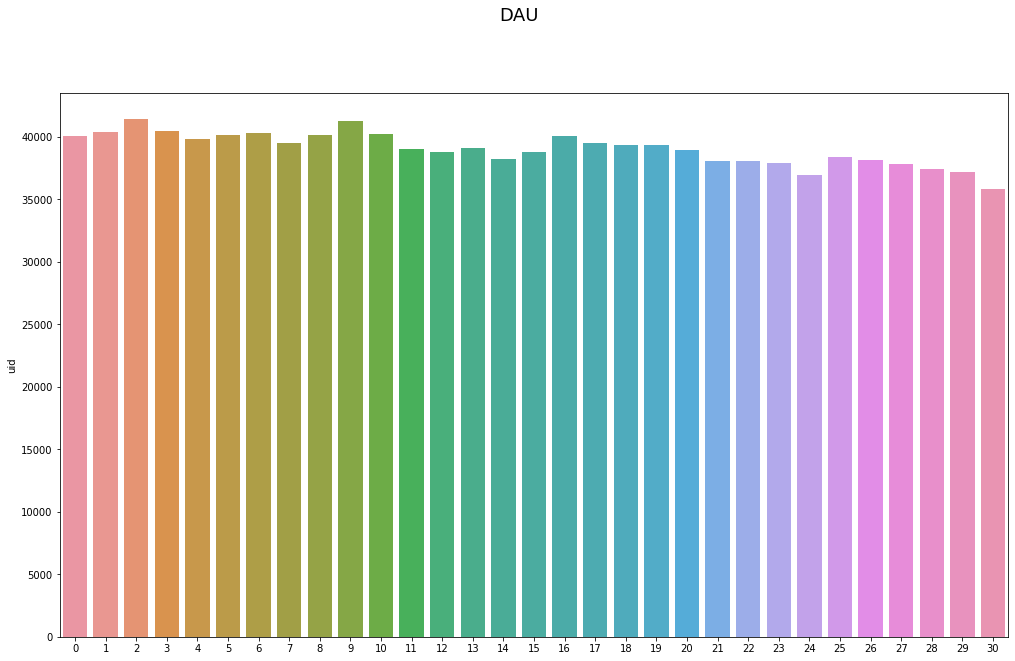

In [20]:
plt.subplots(figsize = (17,10))
sns.barplot(x = dau.index, y='uid', data=dau, ax = plt.subplot(1, 1, 1))
plt.suptitle('DAU',fontsize=18, y=1)

<div style="border:solid blue 2px; padding: 20px">
Посмотрел DAU, для понимания количества игроков в день. Во все дни, оно примерно одинаковое.
</div>


## <a id="step3"></a> Шаг 3. Задание 1. 

### <a id="step4"></a> Предложить метрику, описывающую сложность уровней, и рассчитать ее.

#### Предлагаю посчитать 2 метрики и построить графики:

1. Среднее время от первого действия `failed` до `completed` уровня.
2. Количество действий `failed` до `completed`. Т.е. количество неудачных попыток перед прохождения уровня. 

In [21]:
data_failed = data[data['action']=='failed'][['uid','level', 'action', 'time']]

In [22]:
data_failed

,uid,level,action,time
0,elljQ2EySG03MDU0MTE3MTAyMTE3MA,113,failed,2017-12-01 00:08:44.640
1,elljQ2EySG03MDU0MTE3MTAyMTE3MA,113,failed,2017-12-01 14:13:37.080
2,elljQ2EySG03MDU0MTE3MTAyMTE3MA,113,failed,2017-12-01 14:03:06.271
3,elljQ2EySG03MDU0MTE3MTAyMTE3MA,113,failed,2017-12-01 01:09:00.957
4,elljQ2EySG03MDU0MTE3MTAyMTE3MA,113,failed,2017-12-01 13:54:17.888
...,...,...,...,...
10387705,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,215,failed,2017-12-25 17:39:29.629
10387707,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,214,failed,2017-12-25 17:39:29.629
10387708,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,214,failed,2017-12-25 08:16:50.163
10387710,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,213,failed,2017-12-25 08:16:50.163


In [23]:
data_compl = data[data['action']=='completed'][['uid','level', 'action', 'time']]

In [24]:
data_compl

,uid,level,action,time
13,elljQ2EySG03MDU0MTE3MTAyMTE3MA,113,completed,2017-12-01 16:57:59.951
17,bGd1WnNqQ0ExMTgwMjI3MTAyOTAyMg,395,completed,2017-12-01 00:51:22.146
20,bGd1WnNqQ0ExMTgwMjI3MTAyOTAyMg,398,completed,2017-12-01 06:07:41.684
22,bGd1WnNqQ0ExMTgwMjI3MTAyOTAyMg,397,completed,2017-12-01 06:07:41.684
24,bGd1WnNqQ0ExMTgwMjI3MTAyOTAyMg,396,completed,2017-12-01 06:07:41.684
...,...,...,...,...
10387682,WmQyTHAwVmI2MjMzNTE3MTAyMDE3MQ,94,completed,2017-12-25 15:39:40.674
10387684,WmQyTHAwVmI2MjMzNTE3MTAyMDE3MQ,93,completed,2017-12-25 02:46:25.981
10387700,ekh4bVlJYkk4MTYxMjE3MTAyOTA3Mg,136,completed,2017-12-25 18:58:33.307
10387706,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,214,completed,2017-12-25 17:39:29.629


<div style="border:solid blue 2px; padding: 20px">

Соединяем таблицы

In [25]:
data_merge_all = data_failed.merge(data_compl, left_on=['uid', 'level'], right_on=['uid', 'level'], how='outer', indicator=True)

In [26]:
data_merge_all

,uid,level,action_x,time_x,action_y,time_y,_merge
0,elljQ2EySG03MDU0MTE3MTAyMTE3MA,113,failed,2017-12-01 00:08:44.640,completed,2017-12-01 16:57:59.951,both
1,elljQ2EySG03MDU0MTE3MTAyMTE3MA,113,failed,2017-12-01 14:13:37.080,completed,2017-12-01 16:57:59.951,both
2,elljQ2EySG03MDU0MTE3MTAyMTE3MA,113,failed,2017-12-01 14:03:06.271,completed,2017-12-01 16:57:59.951,both
3,elljQ2EySG03MDU0MTE3MTAyMTE3MA,113,failed,2017-12-01 01:09:00.957,completed,2017-12-01 16:57:59.951,both
4,elljQ2EySG03MDU0MTE3MTAyMTE3MA,113,failed,2017-12-01 13:54:17.888,completed,2017-12-01 16:57:59.951,both
...,...,...,...,...,...,...,...
7981237,bDlUblZRanUyNTc0MDI3MTAyMTEzMA,152,NaN,NaT,completed,2017-12-25 07:54:33.387,right_only
7981238,cHpOT3VPNXg1MjM1MTA3MTAyOTAwMw,242,NaN,NaT,completed,2017-12-25 18:36:42.949,right_only
7981239,WXhKdTdHUEoxMjIyMzE3MTAyOTA5Mg,159,NaN,NaT,completed,2017-12-25 02:53:52.596,right_only
7981240,ZjhiU0dIR0Q4MDk0MDE3MTAyMDE1Mg,107,NaN,NaT,completed,2017-12-25 19:45:31.719,right_only


In [27]:
data_merge_all.columns = ['uid', 'level', 'action_f', 'time_f', 'action_c', 'time_c', '_merge']

In [28]:
both = data_merge_all.query('_merge == "both"').drop('_merge', 1)

<div style="border:solid blue 2px; padding: 20px">

Оставляем строки в которых есть `failed` и `completed`. Остальные рассмотрим ниже.

In [29]:
both

,uid,level,action_f,time_f,action_c,time_c
0,elljQ2EySG03MDU0MTE3MTAyMTE3MA,113,failed,2017-12-01 00:08:44.640,completed,2017-12-01 16:57:59.951
1,elljQ2EySG03MDU0MTE3MTAyMTE3MA,113,failed,2017-12-01 14:13:37.080,completed,2017-12-01 16:57:59.951
2,elljQ2EySG03MDU0MTE3MTAyMTE3MA,113,failed,2017-12-01 14:03:06.271,completed,2017-12-01 16:57:59.951
3,elljQ2EySG03MDU0MTE3MTAyMTE3MA,113,failed,2017-12-01 01:09:00.957,completed,2017-12-01 16:57:59.951
4,elljQ2EySG03MDU0MTE3MTAyMTE3MA,113,failed,2017-12-01 13:54:17.888,completed,2017-12-01 16:57:59.951
...,...,...,...,...,...,...
7081055,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,214,failed,2017-12-25 13:49:13.065,completed,2017-12-25 17:39:29.629
7081056,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,214,failed,2017-12-25 17:39:29.629,completed,2017-12-25 17:39:29.629
7081057,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,214,failed,2017-12-25 08:16:50.163,completed,2017-12-25 17:39:29.629
7081058,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,214,failed,2017-12-25 08:56:55.548,completed,2017-12-25 17:39:29.629


<div style="border:solid blue 2px; padding: 20px">

Группируем строки с минимальным временем `failed`

In [30]:
both_min = both.groupby(['uid','level','action_f', 'action_c']).agg({'time_f': 'min', 'time_c': 'min'}).reset_index()

In [31]:
both_min

,uid,level,action_f,action_c,time_f,time_c
0,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,90,failed,completed,2017-12-02 00:14:52.274,2017-12-02 21:21:55.495
1,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,91,failed,completed,2017-12-02 21:21:55.495,2017-12-02 21:21:55.495
2,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,92,failed,completed,2017-12-02 21:21:55.495,2017-12-03 03:38:31.861
3,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,93,failed,completed,2017-12-03 03:38:31.861,2017-12-03 22:48:56.455
4,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,94,failed,completed,2017-12-05 00:46:35.897,2017-12-05 00:56:19.653
...,...,...,...,...,...,...
2529544,enpzeGNhWUk4MjE0MzE3MTAyMDE5MA,149,failed,completed,2017-12-16 21:26:55.239,2017-12-16 21:26:55.239
2529545,enpzeGNhWUk4MjE0MzE3MTAyMDE5MA,150,failed,completed,2017-12-16 21:30:14.501,2017-12-16 21:30:14.501
2529546,enpzeGNhWUk4MjE0MzE3MTAyMDE5MA,151,failed,completed,2017-12-16 21:38:56.653,2017-12-16 21:38:56.653
2529547,enpzeGNhWUk4MjE0MzE3MTAyMDE5MA,152,failed,completed,2017-12-16 21:58:35.717,2017-12-16 21:58:35.717


In [32]:
both_min['diff'] = (both_min['time_c'] - both_min['time_f'])

In [33]:
both_min['minutes'] = (both_min['diff'].dt.total_seconds()/60).round(2)

In [34]:
both_min

,uid,level,action_f,action_c,time_f,time_c,diff,minutes
0,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,90,failed,completed,2017-12-02 00:14:52.274,2017-12-02 21:21:55.495,21:07:03.221000,1267.05
1,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,91,failed,completed,2017-12-02 21:21:55.495,2017-12-02 21:21:55.495,00:00:00,0.00
2,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,92,failed,completed,2017-12-02 21:21:55.495,2017-12-03 03:38:31.861,06:16:36.366000,376.61
3,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,93,failed,completed,2017-12-03 03:38:31.861,2017-12-03 22:48:56.455,19:10:24.594000,1150.41
4,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,94,failed,completed,2017-12-05 00:46:35.897,2017-12-05 00:56:19.653,00:09:43.756000,9.73
...,...,...,...,...,...,...,...,...
2529544,enpzeGNhWUk4MjE0MzE3MTAyMDE5MA,149,failed,completed,2017-12-16 21:26:55.239,2017-12-16 21:26:55.239,00:00:00,0.00
2529545,enpzeGNhWUk4MjE0MzE3MTAyMDE5MA,150,failed,completed,2017-12-16 21:30:14.501,2017-12-16 21:30:14.501,00:00:00,0.00
2529546,enpzeGNhWUk4MjE0MzE3MTAyMDE5MA,151,failed,completed,2017-12-16 21:38:56.653,2017-12-16 21:38:56.653,00:00:00,0.00
2529547,enpzeGNhWUk4MjE0MzE3MTAyMDE5MA,152,failed,completed,2017-12-16 21:58:35.717,2017-12-16 21:58:35.717,00:00:00,0.00


<div style="border:solid blue 2px; padding: 20px">
    
Смотрим, есть ли строки у которых разность времени `completed` и `failed` - отрицательная.
</div>

In [35]:
diff_minus = both_min[both_min['diff'] < '00:00:00'][['uid', 'level', 'action_f', 'time_f', 'action_c', 'time_c','diff']]

In [36]:
diff_minus

,uid,level,action_f,time_f,action_c,time_c,diff
15359,M1k4ZmNMNVY0NTMwMzI3MTAyMTEwMQ,130,failed,2017-12-20 02:10:35.065,completed,2017-12-03 20:38:33.931,-17 days +18:27:58.866000
15367,M1k4ZmNMNVY0NTMwMzI3MTAyMTEwMQ,138,failed,2017-12-21 02:51:37.121,completed,2017-12-04 15:27:16.829,-17 days +12:35:39.708000
15380,M1k4ZmNMNVY0NTMwMzI3MTAyMTEwMQ,152,failed,2017-12-23 02:26:45.028,completed,2017-12-07 02:10:11.996,-17 days +23:43:26.968000
20600,M2NiNnlJOGszMzAyMjI3MTAyMjEwMQ,10,failed,2017-12-11 21:49:18.178,completed,2017-12-11 21:18:51.272,-1 days +23:29:33.094000
25465,M2xoZEpJM1I5NTgwMDA3MTAyMjE3MA,30,failed,2017-12-08 01:07:15.649,completed,2017-12-07 23:59:27.241,-1 days +22:52:11.592000
...,...,...,...,...,...,...,...
2498664,ekJYNWJBbUU5NDM1MTI3MTAyOTA0Mg,28,failed,2017-12-24 02:31:18.485,completed,2017-12-19 16:42:29.500,-5 days +14:11:11.015000
2498665,ekJYNWJBbUU5NDM1MTI3MTAyOTA0Mg,30,failed,2017-12-24 02:31:18.485,completed,2017-12-19 16:42:29.500,-5 days +14:11:11.015000
2498666,ekJYNWJBbUU5NDM1MTI3MTAyOTA0Mg,31,failed,2017-12-25 02:48:14.982,completed,2017-12-19 16:42:29.500,-6 days +13:54:14.518000
2498679,ekJYNWJBbUU5NDM1MTI3MTAyOTA0Mg,49,failed,2017-12-26 13:44:57.148,completed,2017-12-21 12:28:38.260,-6 days +22:43:41.112000


<div style="border:solid red 2px; padding: 20px">
Да, такие есть. Это вопрос правильности данных. Их всего 216 строк , не берем их в расчет.    
</div>

In [37]:
both_0 = both_min[both_min['diff'] >= '00:00:00'][['uid', 'level', 'action_c', 'time_c', 'action_f', 'time_f','diff','minutes']]

In [38]:
both_0

,uid,level,action_c,time_c,action_f,time_f,diff,minutes
0,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,90,completed,2017-12-02 21:21:55.495,failed,2017-12-02 00:14:52.274,21:07:03.221000,1267.05
1,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,91,completed,2017-12-02 21:21:55.495,failed,2017-12-02 21:21:55.495,00:00:00,0.00
2,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,92,completed,2017-12-03 03:38:31.861,failed,2017-12-02 21:21:55.495,06:16:36.366000,376.61
3,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,93,completed,2017-12-03 22:48:56.455,failed,2017-12-03 03:38:31.861,19:10:24.594000,1150.41
4,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,94,completed,2017-12-05 00:56:19.653,failed,2017-12-05 00:46:35.897,00:09:43.756000,9.73
...,...,...,...,...,...,...,...,...
2529544,enpzeGNhWUk4MjE0MzE3MTAyMDE5MA,149,completed,2017-12-16 21:26:55.239,failed,2017-12-16 21:26:55.239,00:00:00,0.00
2529545,enpzeGNhWUk4MjE0MzE3MTAyMDE5MA,150,completed,2017-12-16 21:30:14.501,failed,2017-12-16 21:30:14.501,00:00:00,0.00
2529546,enpzeGNhWUk4MjE0MzE3MTAyMDE5MA,151,completed,2017-12-16 21:38:56.653,failed,2017-12-16 21:38:56.653,00:00:00,0.00
2529547,enpzeGNhWUk4MjE0MzE3MTAyMDE5MA,152,completed,2017-12-16 21:58:35.717,failed,2017-12-16 21:58:35.717,00:00:00,0.00


In [39]:
both__0 = both_min[both_min['diff'] == '00:00:00'][['uid', 'level', 'action_c', 'time_c', 'action_f', 'time_f','diff','minutes']]

In [40]:
both__0

,uid,level,action_c,time_c,action_f,time_f,diff,minutes
1,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,91,completed,2017-12-02 21:21:55.495,failed,2017-12-02 21:21:55.495,0 days,0.0
6,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,96,completed,2017-12-07 23:40:20.321,failed,2017-12-07 23:40:20.321,0 days,0.0
9,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,101,completed,2017-12-10 23:53:55.501,failed,2017-12-10 23:53:55.501,0 days,0.0
10,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,102,completed,2017-12-10 23:53:55.501,failed,2017-12-10 23:53:55.501,0 days,0.0
11,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,103,completed,2017-12-10 23:53:55.501,failed,2017-12-10 23:53:55.501,0 days,0.0
...,...,...,...,...,...,...,...,...
2529542,enpzeGNhWUk4MjE0MzE3MTAyMDE5MA,147,completed,2017-12-16 17:53:14.097,failed,2017-12-16 17:53:14.097,0 days,0.0
2529544,enpzeGNhWUk4MjE0MzE3MTAyMDE5MA,149,completed,2017-12-16 21:26:55.239,failed,2017-12-16 21:26:55.239,0 days,0.0
2529545,enpzeGNhWUk4MjE0MzE3MTAyMDE5MA,150,completed,2017-12-16 21:30:14.501,failed,2017-12-16 21:30:14.501,0 days,0.0
2529546,enpzeGNhWUk4MjE0MzE3MTAyMDE5MA,151,completed,2017-12-16 21:38:56.653,failed,2017-12-16 21:38:56.653,0 days,0.0


In [41]:
#both = data_gr.sort_values(by = ['uid','level'], ascending = True)

## Метрика 1. <a id="step4"></a> 

In [42]:
final_mean = both_0.groupby(['level']).agg({'minutes': 'mean'}).reset_index().round(2)

In [43]:
final_mean

,level,minutes
0,1,57.45
1,2,337.85
2,3,221.61
3,4,571.93
4,5,130.42
...,...,...
495,496,167.81
496,497,78.64
497,498,201.49
498,499,123.72


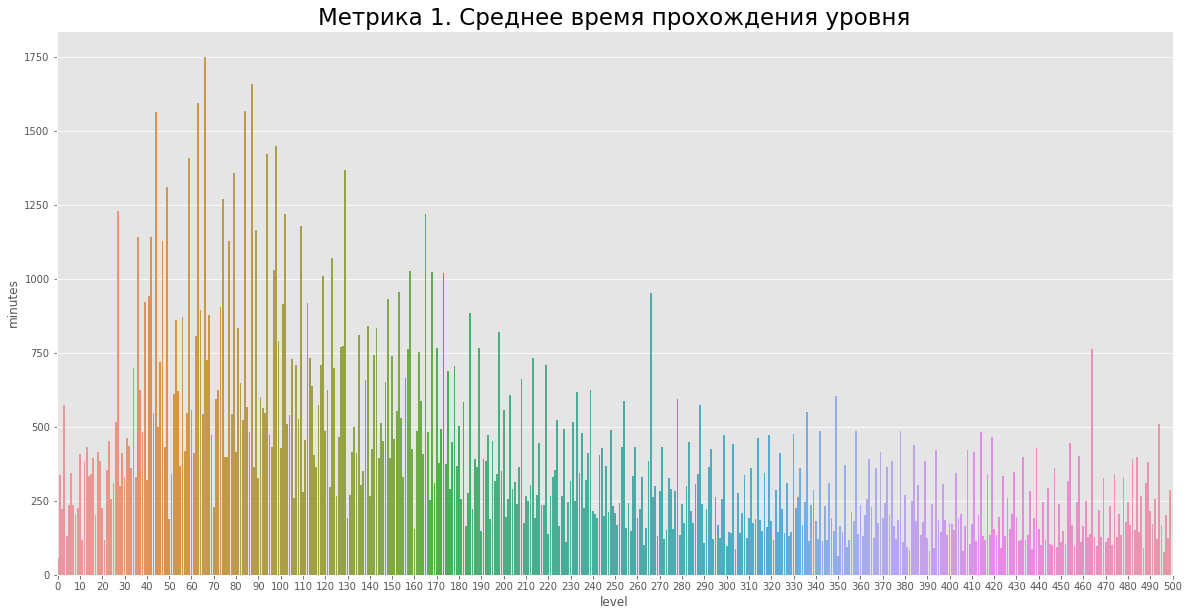

In [44]:
with plt.style.context('ggplot'):
    f, ax = plt.subplots(figsize = (20,10))
    sns.barplot(y = 'minutes', x='level', data = final_mean)
    ax.set_xticks(np.arange(0, max(final_mean['level'])+1, 10))
    ax.set_xticklabels(np.arange(0, 510, 10))
    plt.title('Метрика 1. Среднее время прохождения уровня',fontsize=23, y=1);

<div style="border:solid blue 2px; padding: 20px">
Получили метрику 1.
</div>

## Метрика 2. <a id="step5"></a> 

### Посчитаем количество `failed` перед `comleted`

In [45]:
both['diff'] = (both['time_c'] - both['time_f'])

In [46]:
both['minutes'] = (both['diff'].dt.total_seconds()/60).round(2)

In [47]:
both

,uid,level,action_f,time_f,action_c,time_c,diff,minutes
0,elljQ2EySG03MDU0MTE3MTAyMTE3MA,113,failed,2017-12-01 00:08:44.640,completed,2017-12-01 16:57:59.951,16:49:15.311000,1009.26
1,elljQ2EySG03MDU0MTE3MTAyMTE3MA,113,failed,2017-12-01 14:13:37.080,completed,2017-12-01 16:57:59.951,02:44:22.871000,164.38
2,elljQ2EySG03MDU0MTE3MTAyMTE3MA,113,failed,2017-12-01 14:03:06.271,completed,2017-12-01 16:57:59.951,02:54:53.680000,174.89
3,elljQ2EySG03MDU0MTE3MTAyMTE3MA,113,failed,2017-12-01 01:09:00.957,completed,2017-12-01 16:57:59.951,15:48:58.994000,948.98
4,elljQ2EySG03MDU0MTE3MTAyMTE3MA,113,failed,2017-12-01 13:54:17.888,completed,2017-12-01 16:57:59.951,03:03:42.063000,183.70
...,...,...,...,...,...,...,...,...
7081055,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,214,failed,2017-12-25 13:49:13.065,completed,2017-12-25 17:39:29.629,03:50:16.564000,230.28
7081056,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,214,failed,2017-12-25 17:39:29.629,completed,2017-12-25 17:39:29.629,00:00:00,0.00
7081057,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,214,failed,2017-12-25 08:16:50.163,completed,2017-12-25 17:39:29.629,09:22:39.466000,562.66
7081058,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,214,failed,2017-12-25 08:56:55.548,completed,2017-12-25 17:39:29.629,08:42:34.081000,522.57


In [48]:
both_m0 = both[both['diff'] > '00:00:00'][['uid', 'level', 'action_f', 'time_f', 'action_c', 'time_c','diff','minutes']]

In [49]:
both_m0

,uid,level,action_f,time_f,action_c,time_c,diff,minutes
0,elljQ2EySG03MDU0MTE3MTAyMTE3MA,113,failed,2017-12-01 00:08:44.640,completed,2017-12-01 16:57:59.951,16:49:15.311000,1009.26
1,elljQ2EySG03MDU0MTE3MTAyMTE3MA,113,failed,2017-12-01 14:13:37.080,completed,2017-12-01 16:57:59.951,02:44:22.871000,164.38
2,elljQ2EySG03MDU0MTE3MTAyMTE3MA,113,failed,2017-12-01 14:03:06.271,completed,2017-12-01 16:57:59.951,02:54:53.680000,174.89
3,elljQ2EySG03MDU0MTE3MTAyMTE3MA,113,failed,2017-12-01 01:09:00.957,completed,2017-12-01 16:57:59.951,15:48:58.994000,948.98
4,elljQ2EySG03MDU0MTE3MTAyMTE3MA,113,failed,2017-12-01 13:54:17.888,completed,2017-12-01 16:57:59.951,03:03:42.063000,183.70
...,...,...,...,...,...,...,...,...
7081038,WmQyTHAwVmI2MjMzNTE3MTAyMDE3MQ,93,failed,2017-12-25 00:04:24.276,completed,2017-12-25 02:46:25.981,02:42:01.705000,162.03
7081054,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,214,failed,2017-12-25 13:54:25.796,completed,2017-12-25 17:39:29.629,03:45:03.833000,225.06
7081055,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,214,failed,2017-12-25 13:49:13.065,completed,2017-12-25 17:39:29.629,03:50:16.564000,230.28
7081057,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,214,failed,2017-12-25 08:16:50.163,completed,2017-12-25 17:39:29.629,09:22:39.466000,562.66


In [50]:
both_f_c_gr = both_m0.groupby(['level']).agg({'action_f': 'count'}).reset_index().round(2)
both_f_c_gr

,level,action_f
0,1,8
1,2,200
2,3,250
3,4,75
4,5,856
...,...,...
495,496,387
496,497,168
497,498,420
498,499,234


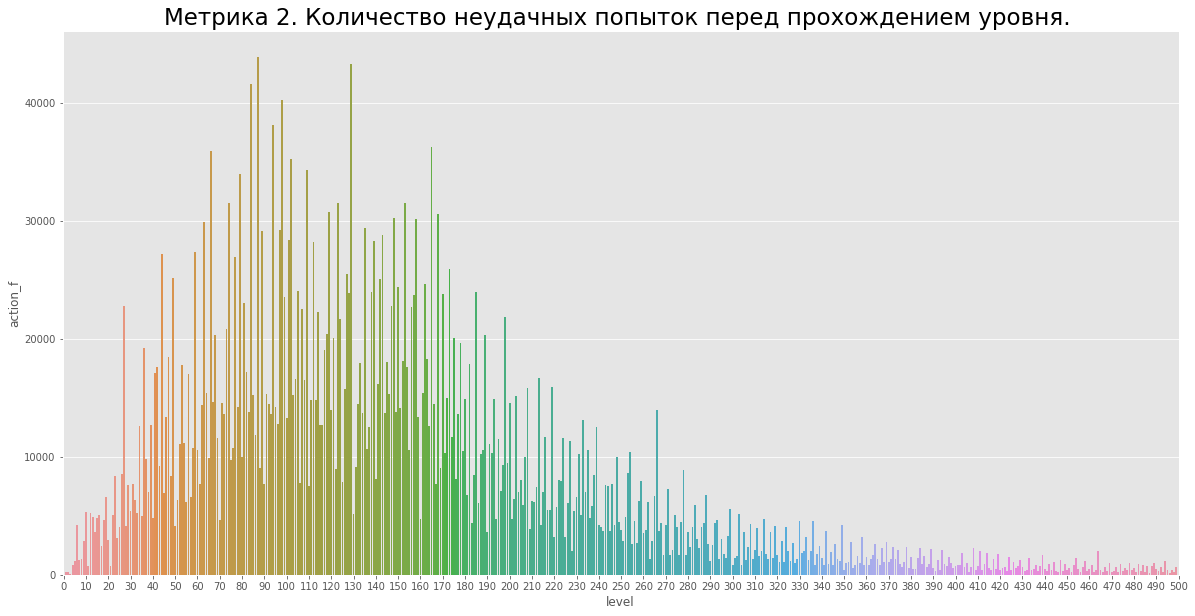

In [51]:
with plt.style.context('ggplot'):
    f, ax = plt.subplots(figsize = (20,10))
    sns.barplot(y = 'action_f', x='level', data = both_f_c_gr)
    ax.set_xticks(np.arange(0, max(both_f_c_gr['level'])+1, 10))
    ax.set_xticklabels(np.arange(0, 510, 10))
    plt.title('Метрика 2. Количество неудачных попыток перед прохождением уровня. ',fontsize=23, y=1);

<div style="border:solid blue 2px; padding: 20px">
Получили метрику 2.
</div>

### <a id="step6"></a> Посчитаем количество неудач `failed` без завершения уровния `comleted`

In [52]:
failed_w_c = data_merge_all.query('_merge == "left_only"').drop('_merge', 1)

In [53]:
failed_w_c

,uid,level,action_f,time_f,action_c,time_c
130,dlc5S1hjTzY1NDY0OTA3MTAyMTEwMw,17,failed,2017-12-01 14:59:09.649,NaN,NaT
131,dlc5S1hjTzY1NDY0OTA3MTAyMTEwMw,17,failed,2017-12-01 03:24:54.754,NaN,NaT
141,d1VtWG1abkIwMzAwMTI3MTAyMDE0MA,78,failed,2017-12-01 23:38:43.571,NaN,NaT
142,d1VtWG1abkIwMzAwMTI3MTAyMDE0MA,78,failed,2017-12-06 19:59:01.482,NaN,NaT
210,RE9iT0VkMmkwMjUwMTI3MTAyMDE4MA,113,failed,2017-12-01 16:40:34.418,NaN,NaT
...,...,...,...,...,...,...
7081049,RjUyaWFnaVQ2MjIxMDE3MTAyMDE5MQ,143,failed,2017-12-25 02:24:05.376,NaN,NaT
7081050,RjUyaWFnaVQ2MjIxMDE3MTAyMDE5MQ,143,failed,2017-12-25 02:14:10.828,NaN,NaT
7081051,ekh4bVlJYkk4MTYxMjE3MTAyOTA3Mg,137,failed,2017-12-25 19:07:46.975,NaN,NaT
7081052,ekh4bVlJYkk4MTYxMjE3MTAyOTA3Mg,137,failed,2017-12-25 19:49:19.342,NaN,NaT


In [54]:
failed_w_c_gr = failed_w_c.groupby(['level']).agg({'action_f': 'count'}).reset_index().round(2)
failed_w_c_gr

,level,action_f
0,1,6
1,2,266
2,3,222
3,4,74
4,5,415
...,...,...
495,496,51
496,497,11
497,498,47
498,499,16


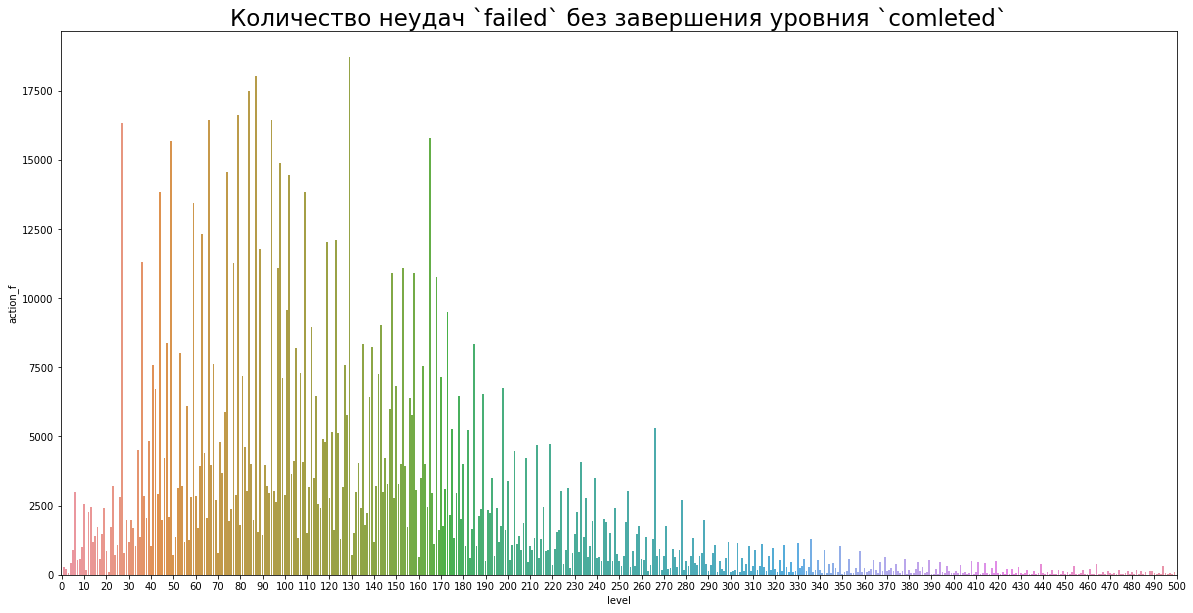

In [55]:
f, ax = plt.subplots(figsize = (20,10))
#ax = plt.gca()
sns.barplot(y = 'action_f', x='level', data = failed_w_c_gr)
ax.set_xticks(np.arange(0, max(failed_w_c_gr['level'])+1, 10))
ax.set_xticklabels(np.arange(0, 510, 10))
plt.title('Количество неудач `failed` без завершения уровния `comleted`',fontsize=23, y=1);

### <a id="step7"></a> Посчитаем количество завершения уровня `completed` без попыток `failed`

In [56]:
compl_w_f = data_merge_all.query('_merge == "right_only"').drop('_merge', 1)

In [57]:
compl_w_f

,uid,level,action_f,time_f,action_c,time_c
7081061,ajZkQU9zSDQ5Mzk0NjE3MTAyMjExMA,8,NaN,NaT,completed,2017-12-01 20:15:25.078
7081062,ajZkQU9zSDQ5Mzk0NjE3MTAyMjExMA,5,NaN,NaT,completed,2017-12-01 17:31:24.873
7081063,ajZkQU9zSDQ5Mzk0NjE3MTAyMjExMA,4,NaN,NaT,completed,2017-12-01 16:59:35.300
7081064,ajZkQU9zSDQ5Mzk0NjE3MTAyMjExMA,3,NaN,NaT,completed,2017-12-01 16:59:35.300
7081065,ajZkQU9zSDQ5Mzk0NjE3MTAyMjExMA,2,NaN,NaT,completed,2017-12-01 16:59:35.300
...,...,...,...,...,...,...
7981237,bDlUblZRanUyNTc0MDI3MTAyMTEzMA,152,NaN,NaT,completed,2017-12-25 07:54:33.387
7981238,cHpOT3VPNXg1MjM1MTA3MTAyOTAwMw,242,NaN,NaT,completed,2017-12-25 18:36:42.949
7981239,WXhKdTdHUEoxMjIyMzE3MTAyOTA5Mg,159,NaN,NaT,completed,2017-12-25 02:53:52.596
7981240,ZjhiU0dIR0Q4MDk0MDE3MTAyMDE1Mg,107,NaN,NaT,completed,2017-12-25 19:45:31.719


In [58]:
compl_w_f_gr = compl_w_f.groupby(['level']).agg({'action_c': 'count'}).reset_index().round(2)
compl_w_f_gr

,level,action_c
0,1,25090
1,2,21942
2,3,20246
3,4,21124
4,5,16622
...,...,...
495,496,85
496,497,150
497,498,85
498,499,117


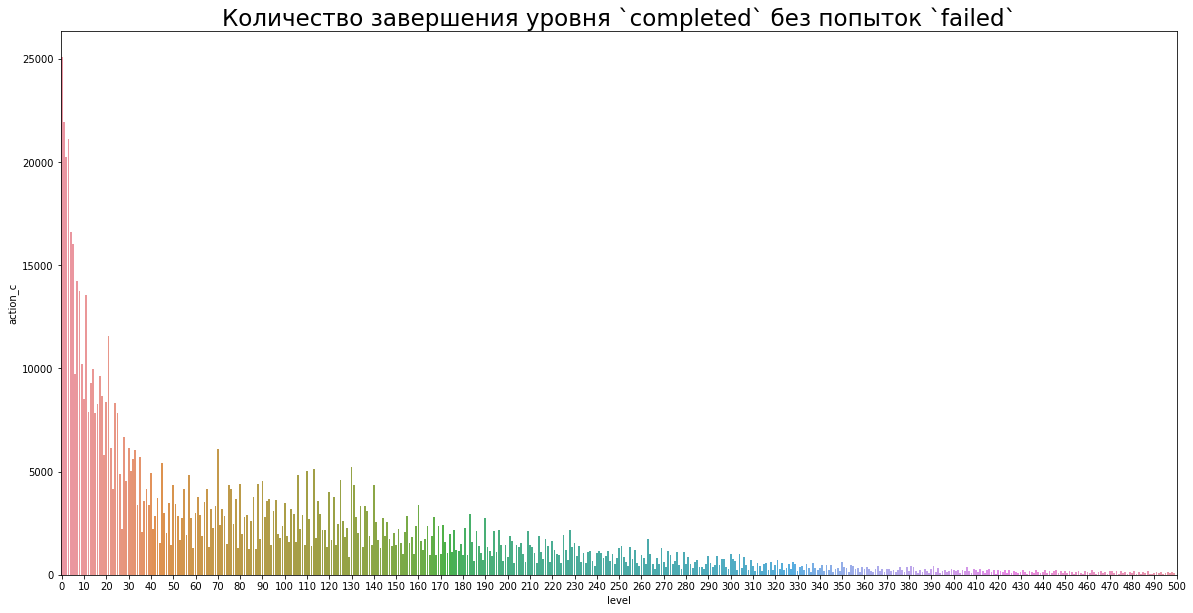

In [59]:
f, ax = plt.subplots(figsize = (20,10))
sns.barplot(y = 'action_c', x='level', data = compl_w_f_gr)
ax.set_xticks(np.arange(0, max(compl_w_f_gr['level'])+1, 10))
ax.set_xticklabels(np.arange(0, 510, 10))
plt.title('Количество завершения уровня `completed` без попыток `failed`',fontsize=23, y=1);

### <a id="step8"></a>Шаг 4. Задание 2. По результатам предыдущего задания разделить уровни на группы по сложности и сделать вывод о плотности расположения сложных уровней в игре.

<div style="border:solid blue 2px; padding: 20px">
    
####  Как мы видим из метрик и графиков предыдущего шага, вначале с 0 по 40 идут несложные уровни. Самые трудные уровни начинаются примерно с 40 по 180, далее сложность постепенно снижается. Со 180 по 250 средней сложности и далее по убывающей.

### <a id="step9"></a>Шаг 5. Задание 3. Рассчитать "воронку" прохождения уровней новым пользователем после установки игры.

In [60]:
data_merge_all

,uid,level,action_f,time_f,action_c,time_c,_merge
0,elljQ2EySG03MDU0MTE3MTAyMTE3MA,113,failed,2017-12-01 00:08:44.640,completed,2017-12-01 16:57:59.951,both
1,elljQ2EySG03MDU0MTE3MTAyMTE3MA,113,failed,2017-12-01 14:13:37.080,completed,2017-12-01 16:57:59.951,both
2,elljQ2EySG03MDU0MTE3MTAyMTE3MA,113,failed,2017-12-01 14:03:06.271,completed,2017-12-01 16:57:59.951,both
3,elljQ2EySG03MDU0MTE3MTAyMTE3MA,113,failed,2017-12-01 01:09:00.957,completed,2017-12-01 16:57:59.951,both
4,elljQ2EySG03MDU0MTE3MTAyMTE3MA,113,failed,2017-12-01 13:54:17.888,completed,2017-12-01 16:57:59.951,both
...,...,...,...,...,...,...,...
7981237,bDlUblZRanUyNTc0MDI3MTAyMTEzMA,152,NaN,NaT,completed,2017-12-25 07:54:33.387,right_only
7981238,cHpOT3VPNXg1MjM1MTA3MTAyOTAwMw,242,NaN,NaT,completed,2017-12-25 18:36:42.949,right_only
7981239,WXhKdTdHUEoxMjIyMzE3MTAyOTA5Mg,159,NaN,NaT,completed,2017-12-25 02:53:52.596,right_only
7981240,ZjhiU0dIR0Q4MDk0MDE3MTAyMDE1Mg,107,NaN,NaT,completed,2017-12-25 19:45:31.719,right_only


In [61]:
compl_w_f111 = data_merge_all.query('_merge == "right_only" or _merge == "both"').drop('_merge', 1)

<div style="border:solid blue 2px; padding: 20px">
Рассчитаем количество пользователей, побывавших на уровне и прошедших его;

In [62]:
funnel_c = data_merge_all.groupby(['level', 'action_c']).agg({'uid': 'nunique'}).reset_index()

In [63]:
funnel_c

,level,action_c,uid
0,1,completed,24157
1,2,completed,21987
2,3,completed,21232
3,4,completed,20864
4,5,completed,20296
...,...,...,...
495,496,completed,409
496,497,completed,400
497,498,completed,388
498,499,completed,399


<div style="border:solid blue 2px; padding: 20px">
    
Рассчитаем количество пользователей, побывавших на уровне, но не прошедших его; 
Берем таблицу `failed` без `complited`
</div>

In [64]:
funnel_f = failed_w_c.groupby(['level', 'action_f']).agg({'uid': 'nunique'}).reset_index()

In [65]:
funnel_f

,level,action_f,uid
0,1,failed,5
1,2,failed,190
2,3,failed,183
3,4,failed,52
4,5,failed,329
...,...,...,...
495,496,failed,24
496,497,failed,8
497,498,failed,24
498,499,failed,8


In [66]:
funnel =  funnel_c.merge(funnel_f, on = 'level', how='inner')

In [67]:
funnel

,level,action_c,uid_x,action_f,uid_y
0,1,completed,24157,failed,5
1,2,completed,21987,failed,190
2,3,completed,21232,failed,183
3,4,completed,20864,failed,52
4,5,completed,20296,failed,329
...,...,...,...,...,...
495,496,completed,409,failed,24
496,497,completed,400,failed,8
497,498,completed,388,failed,24
498,499,completed,399,failed,8


<div style="border:solid blue 2px; padding: 20px">
    
Рассчитаем процент пользователей (от всех побывавших на уровне), не прошедших уровень;
</div>

In [68]:
funnel['%'] = (funnel['uid_y']/(funnel['uid_x'] + funnel['uid_y'])*100).round(3)

In [69]:
funnel.columns = ['level', 'action_c', 'uid_c', 'action_f', 'uid_f', '%']

In [70]:
funnel

,level,action_c,uid_c,action_f,uid_f,%
0,1,completed,24157,failed,5,0.021
1,2,completed,21987,failed,190,0.857
2,3,completed,21232,failed,183,0.855
3,4,completed,20864,failed,52,0.249
4,5,completed,20296,failed,329,1.595
...,...,...,...,...,...,...
495,496,completed,409,failed,24,5.543
496,497,completed,400,failed,8,1.961
497,498,completed,388,failed,24,5.825
498,499,completed,399,failed,8,1.966


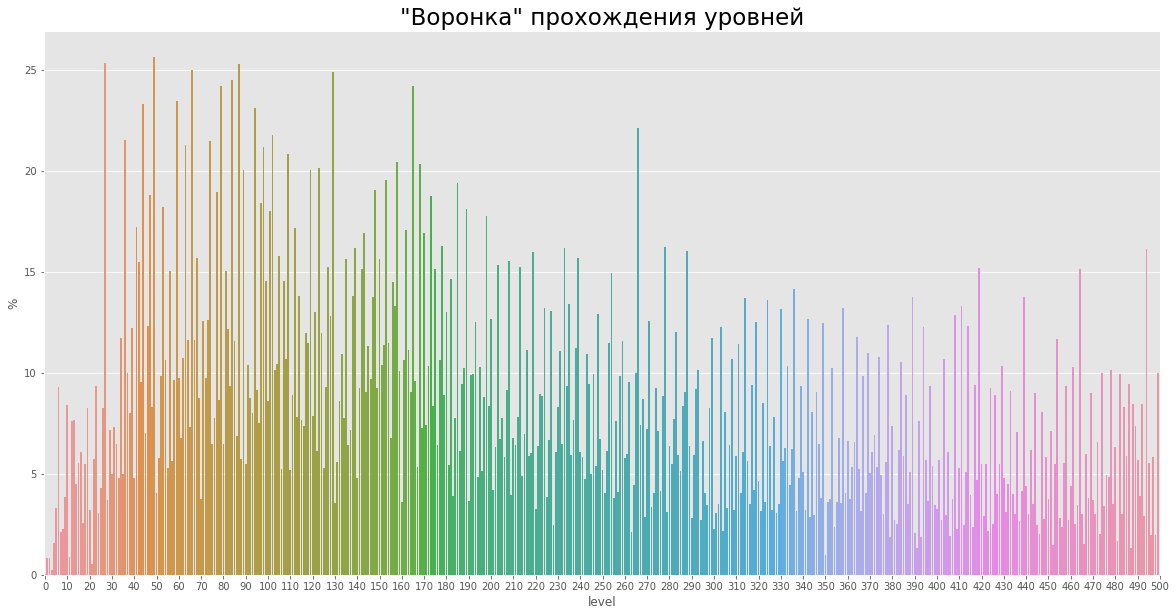

In [71]:
with plt.style.context('ggplot'):
    f, ax = plt.subplots(figsize = (20,10))
    sns.barplot(y = '%', x='level', data = funnel)
    ax.set_xticks(np.arange(0, max(funnel['level'])+1, 10))
    ax.set_xticklabels(np.arange(0, 510, 10))
    plt.title('"Воронка" прохождения уровней',fontsize=23, y=1);

<div style="border:solid blue 2px; padding: 20px">
    
Здесь также видим на уровнях с 40 по 180 наибольший процент пользователей не прошедших уровень;
</div>